# **Amazon Textract**

### -- Investigation on Deploying Amazon Textract on Rotated Images and Handwritten Text

link to [Github Repo](https://github.com/ka4on/QTM350-Final-Project)
***

### **Group Member**

#### Kelly Tong
This is Kelly Tong, a current Junior at Emory. I have declared Quantitative Science (QSS) as my major with Economics as my track. I am also interested in film studies and learning Japanese.

#### Kairan Zhong
Hi, my name is **Kairan Zhong**. I am currently a senior student at [Emory University](https://www.emory.edu/home/index.html). My major is [AMS](https://apply.emory.edu/majors/applied-mathematics-and-statistics.html). Link to [Linkedin](https://www.linkedin.com/in/kairan-zhong-7280521a7/).
####Hobbies
* Anime, my favorite one is [Haikyuu](https://www.netflix.com/title/80090673).
* soccer, my favorite team is [FC Barcelona](https://www.fcbarcelona.com/en/).
* video games, my favorite one is Divinity: Original Sin 2.

#### Tiger Sun
Hello! My name is Tiger Sun,a senior at [Emory University](https://www.emory.edu/home/index.html). I major in [QSS](http://quantitative.emory.edu/undergraduate/majors-minors/index.html) on the **informatics track**. My favourite game is League of Legends.

#### Felix Zheng
Hello. My name is Felix Zheng. I am a senior student in **Emory University**. I major in [QSS](http://quantitative.emory.edu/undergraduate/majors-minors/index.html) on the **economics track** and [Biology](http://www.biology.emory.edu/degree-programs).

#### Yuan Wang
My name is Yuan Wang, a graduating senior student majoring in AMS. One fun fact about me is that, currently I am doing an internship in an internet company in Beijing, China while taking the online courses. In this case, I need to get up at 5.15 a.m. to attend the course. So the recorded lecture definitely saves my life, since I don't have to worry too much when I fail to get up and miss the course. LinkedIn page:[link](https://www.linkedin.com/in/yyyuan-wang/). 

#### Yolanda Cao
I am currently a Junior majoring in Economics and Quantitative Science Econ track.
***

### **Introduction**

As we have learnt more about machine learning (ML) services during the course, we become more astonished with the increasing variety of tasks that can be accomplished by machines. One of an important services that machine learning enables is automatic extraction of texts, data and information from documents. Individuals and companies, especially, become more reliable on these artificial intelligence based services to extract useful information from commonly unstructured formats, including invoices, emails, receipts and PDF files etc. 

In this project, we will discuss a deep learning-based service that supports these functions: AWS Textract. It is able to convert different types of given documents, including invoices and handwritten texts, into editable formats.  We will begin with an overview of the service, test the functions of Amazon Textract and applying them to real life data. Then, we will provide analysis and evaluation on the reliability and efficiency of the service in achieving the tasks. Furthermore, we will also try to discover hidden variables that might lead to potential issues of the service. In particular, as we may encounter documents that are tilted or handwritten in real life, we wonder if Textract could still run the output successfully. Our group is eager to discover more about Textract so that we could better enjoy this convenient service while encountering document processing in the future.
***

### **Textract**

[Amazon Textract](https://aws.amazon.com/cn/textract/) is a machine learning (ML) service on [AWS](https://aws.amazon.com/) that uses OCR to automatically extract text, handwriting, and data from scanned documents such as PDFs. To get started using Amazon Textract on AWS, follow the instructions [here](https://docs.aws.amazon.com/textract/latest/dg/getting-started.html).
***

### Architecture Overview

![archi](https://webpage-kairan.s3.amazonaws.com/archi.jpg)

The diagram illustrates the overall outline of what AWS services were utilized in this architecture. 
The user first uploads the document using the Amazon Simple Storage Service (S3). Once the document is in the web bucket, it could then be accessed by Amazon SageMaker, the primary tool to train and deploy machine learning models in AWS. Through the Jupyter notebook hosted within the EC2 T3 instance, the user uses the command line interface to pass the data to Amazon Textract. Upon extraction, the text is transformed and stored once again for the user to view.
***

### **Hypothesis**
* Textract is able to recognize texts in rotated images
* Textract is able to recognize handwritten texts
* Textract is able to recognize languages other than English (Chinese)
* Textract is **not** able to recognize texts from an image that is partially rotated 
***

### **1. Test on Rotation**

**Goal:** The photo we use is Sonnet 18 by William Shakespeare. We also have the same image but rotating it by 45 degrees 8 times. We want to see if `textract` is able to detect images that have been rotated and still provide the correct output. For convenience of testing, we pick the last two lines of the poem. For the code of rotating photos, click [here](https://github.com/ka4on/QTM350-Final-Project/blob/main/rotate.ipynb).

![Example](https://final-source.s3.amazonaws.com/example.jpg)

Use api call to use aws Textract service, it automatically extracts text, handwriting and data from scanned documents. let's have a quick look of its json output:

In [1]:
!aws textract detect-document-text --document '{"S3Object":{"Bucket":"final-source", "Name":"example.jpg"}}'

{
    "DocumentMetadata": {
        "Pages": 1
    },
    "Blocks": [
        {
            "BlockType": "PAGE",
            "Geometry": {
                "BoundingBox": {
                    "Width": 1.0,
                    "Height": 1.0,
                    "Left": 0.0,
                    "Top": 0.0
                },
                "Polygon": [
                    {
                        "X": 0.00014857879432383925,
                        "Y": 0.0
                    },
                    {
                        "X": 1.0,
                        "Y": 0.00014857879432383925
                    },
                    {
                        "X": 0.999851405620575,
                        "Y": 1.0
                    },
                    {
                        "X": 0.0,
                        "Y": 0.999851405620575
                    }
                ]
            },
            "Id": "90e1a252-19cc-468b-9911-815360171f8a",
            "Relationships": [
            

From the json output, we can see that `textract` identifies each lines and the individual words. Useful variables include **Blocktype**, **Confidence**, **Text**, and **TextType**.

Import Python SDK

In [3]:
import boto3

Next, we create an instance `client` of the client object in the `boto3` package for `textract`. It will allow use to communicate and make requests to the Textract service using Python. 

In [4]:
textract=boto3.client('textract')

Function for getting file name in a bucket

In [5]:
def fname(bucket):
    s3_resource = boto3.resource('s3')
    my_bucket = s3_resource.Bucket(bucket)  #get the bucket
    summaries = my_bucket.objects.all()     #get files inside and loop through
    tmp = []
    for image in summaries:
        tmp.append(image.key)
    return tmp

In [6]:
fname("final-test-kz")

['example_135.jpg',
 'example_180.jpg',
 'example_225.jpg',
 'example_270.jpg',
 'example_315.jpg',
 'example_45.jpg',
 'example_90.jpg']

Now, using the client, we use the dot notation to access one of its methods, `detect_document_text`. This method returns the text it textract detects. 

In [7]:
def text(bName, fName):
    res = ""
    response = textract.detect_document_text(    #get json output from textract
    Document={
        'S3Object': {
            'Bucket': bName,
            'Name': fName
        }
    })
    for item in response["Blocks"]:     #append results together
        if item["BlockType"] == "LINE":
           res += item["Text"] 
    return res

Let's check the output

In [8]:
print(text("final-test-kz","example_45.jpg"))

So long as men can breathe or eyes can see,So long lives this and this gives life to thee.Sonnet 18


### **TextType**

We also want to see different textypes `textract` is able to recognize. Here's a function to count number of different textypes.

In [8]:
from collections import Counter
def count_type(bName, fName):
    res = []
    count = 0
    response = textract.detect_document_text(   # get output
    Document={
        'S3Object': {
            'Bucket': bName,
            'Name': fName
        }
    })
    for item in response["Blocks"]:            #get textype
        if item["BlockType"] == "WORD":
            res.append(item['TextType'])       
    return Counter(res)                        #count

We also want to know if the document is mostly printed, handwritten, or a mixture of both. We set benchmark at (0-33, 34-66, 67-100) percent to distinguish different types.

In [9]:
def get_type(bName,fName):
    temp = count_type(bName, fName)
    pct = temp['PRINTED'] / sum(temp.values())
    key = ""
    if pct < 0.34:
        key = "HANDWRITING"
    elif pct < 0.67:
        key = "MIXED"
    else: key = "PRINTED"
    return key

Let's check how many printed/handwriting words and what's the major textype of the above photo.

In [10]:
print(count_type("final-source","example.jpg"))

Counter({'PRINTED': 20, 'HANDWRITING': 2})


In [11]:
print(get_type("final-source","example.jpg"))

PRINTED


### **Accuracy**

We use `SequenceMatcher` from `difflib`, it can be used to compare string similarity and can produce information about there differences. We apply this method here to find accuracy of the text output we get.

For more information about `SequenceMatcher`, click [here](https://www.educative.io/edpresso/what-is-sequencematcher-in-python).

In [12]:
from difflib import SequenceMatcher

 get our output accuracy by comparing with the original text using `SequenceMatcher`

In [13]:
def accuracy(source, target):
    return SequenceMatcher(None, source, target).quick_ratio()

Check the output of the original text

In [14]:
source = text("final-source","example.jpg")
source

'So long as men can breathe or eyes can see,So long lives this and this gives life to thee.Sonnet 18'

 get file name in the bucket and run accuracy test for all of our rotated photos.

In [15]:
images = fname("final-test-kz")

In [16]:
acc = {}
for image in images:
    try:
        target = text("final-test-kz",image)
        res = accuracy(source, target)
        acc[image] = res
    except:
        acc[image] = -1
acc

{'example_135.jpg': 1.0,
 'example_180.jpg': 1.0,
 'example_225.jpg': 1.0,
 'example_270.jpg': 1.0,
 'example_315.jpg': 1.0,
 'example_45.jpg': 1.0,
 'example_90.jpg': 1.0}

**Findings:** The number behined **"example_"** represents the angle rotated. From the output, we can see that `textract` manages to detect text in rotated photos 100% correct. **AMAZING!!!**

### **Create Dataset for rotated photos**

In [17]:
import pandas as pd

 Change name of varaible and sort the names of  photos in ascending order by angles

In [18]:
images

['example_135.jpg',
 'example_180.jpg',
 'example_225.jpg',
 'example_270.jpg',
 'example_315.jpg',
 'example_45.jpg',
 'example_90.jpg']

In [19]:
names = [x.replace('.jpg', '').replace('example_',"") for x in images]
newname = []
for item in names:
    newname.append(int(item))
newname.sort()
newname

[45, 90, 135, 180, 225, 270, 315]

Create Dataset

In [20]:
df =pd.DataFrame({'Rotated Angle':newname})
res = []
for photo in images:
    target = text("final-test-kz", photo)
    res.append(target)
df['Accuracy'] = [accuracy(source, photo) for photo in res]
df['texttype'] = [get_type("final-test-kz", fname) for fname in images ]
df['Num_Printed'] = [count_type("final-test-kz", fname)['PRINTED'] for fname in images]
df['Num_Written'] = [count_type("final-test-kz", fname)['HANDWRITING'] for fname in images]

In [21]:
df

,Rotated Angle,Accuracy,texttype,Num_Printed,Num_Written
0,45,1.0,PRINTED,20,2
1,90,1.0,PRINTED,21,1
2,135,1.0,PRINTED,20,2
3,180,1.0,PRINTED,21,1
4,225,1.0,PRINTED,20,2
5,270,1.0,PRINTED,20,2
6,315,1.0,PRINTED,21,1


**Findings:** The outputs are 100% correct. It is amazing that we see `textract` is able to recognize images that rotate in various angles. 

We can also see that `textract` is able to recognize the different texttypes. Although the text in the example we use are all printed, `textract` seems identify some words as handwritten. Let's check out what they are:

In [22]:
response = textract.detect_document_text(Document={'S3Object': {'Bucket': 'final-source','Name': 'example.jpg'}})

Create a method that gets specific type of words

In [23]:
def getword(response, type):
    try:
        res = []
        for item in response["Blocks"]:
            if item["BlockType"] == "WORD" and item["TextType"] == type:
                 res.append(item['Text'])
        return res
    except:
        print("ERROR! No words found!")

In [24]:
print(getword(response, "HANDWRITING"))

['Sonnet', '18']


So `textract` believes that "Sonnet 18" are handwritten texts. Let's take it look at what they look like.

![Handwritten](https://webpage-kairan.s3.amazonaws.com/sonnet18.jpg)

**Findings:** The italic and ornamental type of words are indeed pretty close to human-written texts. Still, `textract` fails to recognize that these words are printed by computer. This makes us want to further investigate `textract` accuracy in identifying handwritten texts.
***

### **2. Process Handwritten Texts using Textract**

**Goal:** Check the accuracy of `textract` processing handwritten texts

We find [online](https://www.kaggle.com/ssarkar445/handwriting-recognitionocr) a dataset of handwrittern names and their true printed names stored in a [csv file](https://github.com/ka4on/QTM350-Final-Project/blob/main/true_result.csv). We take 100 of them and run analysis.

The dataset images contain only names, and because of personal habits, some names are written with a white space between each two characters, which can cause unnecessary errors. Since the names are not very long, a more precise comparison needs to be conducted. Hence, rewrite the accuracy calculating function when calculating the acrruacy, the white spaces in the resulting strings should be removed in order to get the true accuracy rate.

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

In [26]:
def name_accuracy(source,target):
    return SequenceMatcher(None, source.replace(" ", ""), target.replace(" ", "")).quick_ratio()

A quick look at a few example of the written names we have.

![name](https://hand-test.s3.amazonaws.com/TRAIN_00006.jpg)

![name](https://hand-test.s3.amazonaws.com/TRAIN_00003.jpg)

![name](https://hand-test.s3.amazonaws.com/TRAIN_00011.jpg)

the csv file storing all the true names

In [27]:
true_result = pd.read_csv('true_result.csv',index_col=['FILENAME'])

create a dict storing the accuracy of each image

In [28]:
acc_dict = {}

find all the images stored in the handwritten folder

In [29]:
images = fname("hand-test")

Compare with the true names and find accuracy

In [30]:
for item in images:
    res = text("hand-test", item)  # store the result of Textract
    acc_dict[item] = name_accuracy(res,true_result.loc[item]['IDENTITY']) # store the calculated accuracy to the dict
acc_dict

{'TRAIN_00003.jpg': 1.0,
 'TRAIN_00006.jpg': 0.0,
 'TRAIN_00011.jpg': 0.75,
 'TRAIN_00013.jpg': 1.0,
 'TRAIN_00014.jpg': 0.5714285714285714,
 'TRAIN_00017.jpg': 0.8571428571428571,
 'TRAIN_00020.jpg': 0.6666666666666666,
 'TRAIN_00022.jpg': 1.0,
 'TRAIN_00023.jpg': 1.0,
 'TRAIN_00025.jpg': 0.875,
 'TRAIN_00027.jpg': 0.8333333333333334,
 'TRAIN_00028.jpg': 1.0,
 'TRAIN_00030.jpg': 1.0,
 'TRAIN_00033.jpg': 1.0,
 'TRAIN_00034.jpg': 1.0,
 'TRAIN_00036.jpg': 0.875,
 'TRAIN_00037.jpg': 0.8,
 'TRAIN_00040.jpg': 0.8333333333333334,
 'TRAIN_00041.jpg': 0.8333333333333334,
 'TRAIN_00042.jpg': 0.16666666666666666,
 'TRAIN_00043.jpg': 0.8,
 'TRAIN_00044.jpg': 0.875,
 'TRAIN_00048.jpg': 0.8888888888888888,
 'TRAIN_00049.jpg': 1.0,
 'TRAIN_00050.jpg': 1.0,
 'TRAIN_00051.jpg': 1.0,
 'TRAIN_00052.jpg': 0.8,
 'TRAIN_00055.jpg': 0.8333333333333334,
 'TRAIN_00056.jpg': 0.75,
 'TRAIN_00057.jpg': 0.375,
 'TRAIN_00059.jpg': 1.0,
 'TRAIN_00061.jpg': 0.0,
 'TRAIN_00063.jpg': 0.75,
 'TRAIN_00065.jpg': 1.0,
 'T

Plot the distribution graphs

<function matplotlib.pyplot.show(close=None, block=None)>

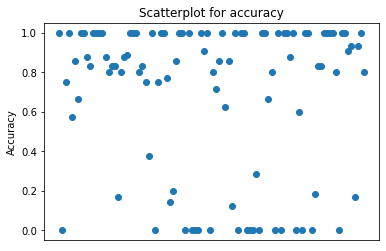

In [36]:
plt.scatter(acc_dict.keys(),acc_dict.values())
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
plt.title("Scatterplot for accuracy")
plt.ylabel("Accuracy")
plt.show

Text(0.5, 0, 'Accuracy')

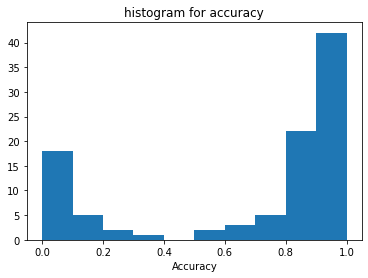

In [37]:
plt.hist(acc_dict.values())
plt.title("histogram for accuracy")
plt.xlabel('Accuracy')

**Findings:** Generally speaking, the Textract can be regarded as a reliable handwritten text reader. According to the histogram, Textract is unlikely to have a result that is partially correct, and in this case, when used in practice, people do not have to check the result all the time. Instead, people only need to manually read the wrong results, and that can be much more efficient than the case where a partially correct result is very likely and people need to check every single outcome.
***

### **3. Process other languages using Textract**

**Goal:** Check if `Textract` could recognize Chinese.

Since our group's native language is Chinese, we also want to see if textract can recognize languages other than English. I write down the Chinese translation of the previous Shakespeare's lines.

In [33]:
from PIL import Image
import s3fs
fs = s3fs.S3FileSystem()
file = fs.open('s3://final-chn/chinese.jpg')

Change the size of our photo 

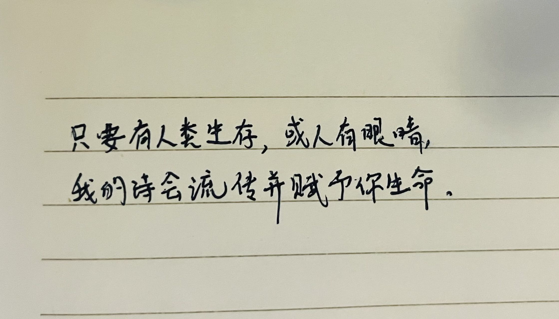

In [34]:
image = Image.open(file)
(width, height) = (image.width // 4, image.height // 4)
im_resized = image.resize((width, height))
display(im_resized)

Check the output

In [35]:
print(text("final-chn","chinese.jpg"))

EX the, .


**Findings:** Unfortunately in this case, `textract` is not able to return any Chinese characters, thus we cannot use it to process documents written in Chinese. We check [online](https://aws.amazon.com/cn/about-aws/whats-new/2020/11/amazon-textract-supports-handwriting-and-five-new-langauges/) what languages textract are able to process, they are: **English, Spanish, German, Italian, Portuguese, and French**. Unfortunately, `textract` cannot process document written in Chinese.
***

### **4. Performance of Textract on edge cases**

**Goal:** Test the performance of `Textract` on edge cases: images that are partially mirror-flipped or rotated

Finally, we want to look at performance of `textract` in rare situations. To investigate this, we prepare an edge case to see the service's performance. 

We manually mirror flip the ending part vertically so the words are at their correct position in each sentence. Let' see how the document looks now. 

![test2](https://final-source.s3.amazonaws.com/test2.jpg)

Let's check the test result:

In [38]:
print(text("final-source","test2.jpg"))

So long as men can breathe OL GAGE CSIJ 266'So long lives this and this gives foSonnet 18


Check accuracy

In [39]:
target = text("final-source","test2.jpg")
accuracy(source,target)

0.7978723404255319

**Findings:** We can see our accuracy drops to 0.79 compare to the previous result of 1, and obviously textract fail to recognize the part we manually flip: **"or eyes can see"** becomes **"OL GAGE CSIJ 266"** and **"life to thee"** reduces to **"fo"**. Compare the output with the document, we may infer  that `textract` believes that nothing has not been flipped or rotated in the document, and treats every words it sees as normal. In fact, the output **"OL GAGE CSIJ 266"** looks quite similar to the corresponding part appear in the document. 

To further investigate the problem, let's take out the mirror flipped part and see if textract could recognize the words. 

![original](https://final-source.s3.amazonaws.com/source2-flip1.jpg)

![flip](https://final-source.s3.amazonaws.com/source3.jpg)

Check output

In [40]:
original = text("final-source","source2-flip1.jpg")
original

'or eyes can see,'

In [41]:
flipped =  text("final-source","source3.jpg")
flipped 

'OL GAGE CSIJ 266'

In [42]:
accuracy(original, flipped)

0.1875

**Findings:** Now we can see the problem is that `textract` simply cannot recognize words that are mirror flipped. It treats the words as normal and output the word its shape looks like. Although such mirror flip only happens in rare cases, we wish `textract` add this function in the future. 

This also intrigues us to learn if we simply rotate part of the words without mirror flipping it (so the words are not at their correct position in sentence now), will `textract` able to recognize the words?

![test3](https://final-source.s3.amazonaws.com/test3.jpg)

Let' see the test result:

In [43]:
print(text("final-source","test3.jpg"))
target = text("final-source","test3.jpg")
print("accuracy:" + str(accuracy(source,target)))

So long as men can breathe 'oos uso IOSo long lives this and this gives 01 3J!ISonnet 18
accuracy:0.8235294117647058


Similar to the mirror flip case, `textract` was not able to recognize the part being upside down and process the words as normal ones. Now, what will the output be if we take out these parts seperately?

![original](https://final-source.s3.amazonaws.com/source2-flip1.jpg)

![rotate](https://final-source.s3.amazonaws.com/source2-flip3.jpg)

In [44]:
target =  text("final-source","source2-flip3.jpg")
print("output:" + target)
print("accuracy:" + str(accuracy(source,target)))

output:ue sona IO
accuracy:0.12844036697247707


**Findings:** We can see from previous test cases, `textract` is **not** able to recognize documents that are partially rotated.

It is also really interesting since previously we have tested that `textract` is able to recognize document that is rotated 180 degree, which is also what we have done to this small part. The output here turns out that `textract` fails to recognize the document being rotated. So does the scale of the document matter? Let's find out if we rotate a line of different lengths.
***

### **Images of different text lengths**

In [45]:
from PIL import Image
import requests

def open_pic(bName):
    tmp = fname(bName)
    for name in tmp:
        img = Image.open(requests.get( f"https://{bName}.s3.amazonaws.com/{name}", stream=True).raw ) 
        img.show()

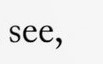

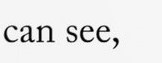

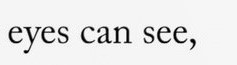

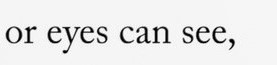

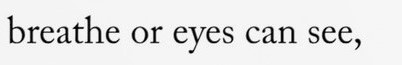

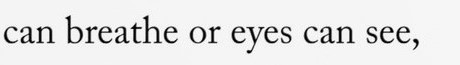

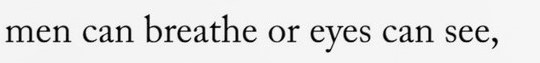

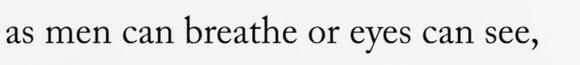

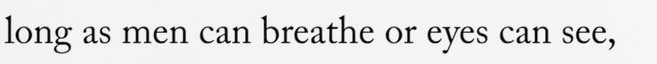

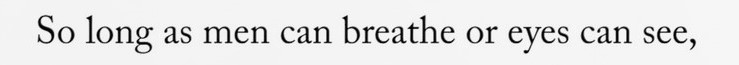

In [46]:
open_pic('source-line')

We rotate 180 degree of all above lines, and let's see `textract` performance.

In [47]:
origin = fname("source-line")
origin

['length1.jpg',
 'length2.jpg',
 'length3.jpg',
 'length4.jpg',
 'length5.jpg',
 'length6.jpg',
 'length7.jpg',
 'length8.jpg',
 'length9.jpg',
 'lineall.jpg']

In [48]:
test = fname('test-line-kz')
test

['test1.jpg',
 'test2.jpg',
 'test3.jpg',
 'test4.jpg',
 'test5.jpg',
 'test6.jpg',
 'test7.jpg',
 'test8.jpg',
 'test9.jpg',
 'testall.jpg']

Create a method to compare similarity

In [49]:
def compare(source, test):
    res = {}
    for i in range(len(source)):
        origin = text("source-line", source[i])
        now = text("test-line-kz", test[i])
        temp = accuracy(origin, now)     # get accuracy
        res["length" + " " + str(i+1)] = temp
    return res

Create a method to find `textract` confidence in its output

In [50]:
def confidence(bName, fName):
    res = []
    avg = 0
    response = textract.detect_document_text(   # get output 
    Document={
        'S3Object': {
            'Bucket': bName,
            'Name': fName
        }
    })
    for item in response['Blocks']:
        if item["BlockType"] == "WORD":      # get average confidence 
            res.append(item["Confidence"])
            avg= sum(res)/ len(res)
        elif  item["BlockType"] == "LINE":
            res.append(item["Confidence"])
            avg= sum(res)/ len(res)
        else: avg = -1
    return avg

In [51]:
confidence("source-line","length2.jpg")

99.86769612630208

Change name of variables

In [52]:
name = [x.replace('.jpg', '').replace('length','') for x in origin]
name[9] = 10   # change last name to 10
name2 = []
for item in name:
    name2.append(int(item))
name2.sort()     # sort the name list
name2

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Create Dateframe for the result

In [53]:
df2 =pd.DataFrame({'Num_words':name2})
df2['original'] = [text("source-line", name) for name in origin]
df2['rotate'] = [text("test-line-kz", name) for name in test]
df2['Accuracy'] = compare(origin, test).values()
df2['Confidence'] = [confidence("test-line-kz", name) for name in test]

In [54]:
df2

,Num_words,original,rotate,Accuracy,Confidence
0,1,,'oos,0.000000,24.035820
1,2,"can see,","can see,",1.000000,99.864110
2,3,"eyes can see,",'oos uso,0.285714,26.157518
3,4,"or eyes can see,",'oos ue IO,0.384615,36.254970
4,5,"breathe or eyes can see,","breathe or eyes can see,",1.000000,99.893243
5,6,"can breathe or eyes can see,","can breathe or eyes can see,",1.000000,99.920636
6,7,"men can breathe or eyes can see,","men can breathe or eyes can see,",1.000000,99.922572
7,8,"as men can breathe or eyes can see,","as men can breathe or eyes can see,",1.000000,99.919025
8,9,"long as men can breathe or eyes can see,","long as men can breathe or eyes can see,",1.000000,99.372752
9,10,"So long as men can breathe or eyes can see,","So long as men can breathe or eyes can see,",1.000000,99.793393


**Findings:** It's quite weird that **textract** fails to recognize the single word "see" without being rotated. But anyways we do see with increase in number of words, textract has a better idea of whether the photo has been rotated, resulting in a more accurate output.

#### Plot graphs

In [55]:
import matplotlib.pyplot as plt

Histogram for Accuracy and Confidence

Text(0, 0.5, 'Count')

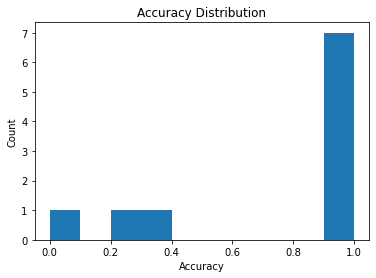

In [56]:
plt.hist(df2['Accuracy'])
plt.title('Accuracy Distribution' )
plt.xlabel("Accuracy")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

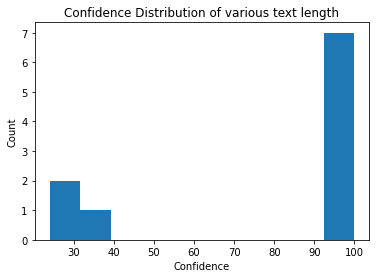

In [57]:
plt.hist(df2['Confidence'])
plt.title('Confidence Distribution of various text length' )
plt.xlabel("Confidence")
plt.ylabel("Count")

Text(0, 0.5, 'Accuracy')

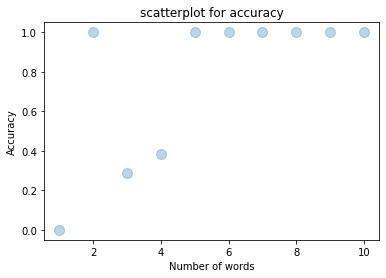

In [58]:
plt.plot(df2['Num_words'], df2['Accuracy'], 'o', alpha=0.3, markersize=10)
plt.title('scatterplot for accuracy' )
plt.xlabel("Number of words")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Number of Words')

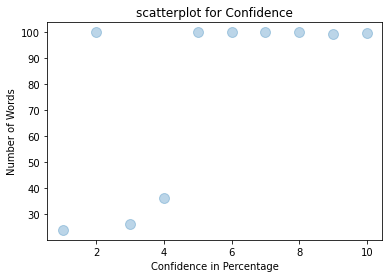

In [59]:
plt.plot(df2['Num_words'], df2['Confidence'], 'o', alpha=0.3, markersize=10)
plt.title('scatterplot for Confidence' )
plt.xlabel("Confidence in Percentage")
plt.ylabel("Number of Words")

Add a regression line

In [60]:
import statsmodels.formula.api as smf

In [61]:
result1 = smf.ols('Accuracy ~ Num_words', data=df2).fit()
result2 = smf.ols('Confidence ~ Num_words', data=df2).fit()

In [62]:
result1.params

Intercept    0.286447
Num_words    0.087379
dtype: float64

In [63]:
result2.params

Intercept    37.239525
Num_words     7.504342
dtype: float64

Text(0, 0.5, 'Accuracy')

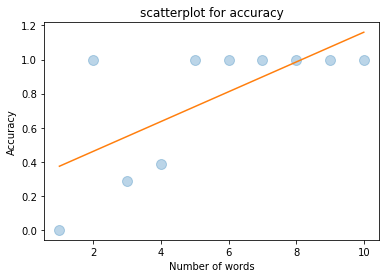

In [64]:
plt.plot(df2['Num_words'], df2['Accuracy'], 'o', alpha=0.3, markersize=10)
plt.plot(df2['Num_words'], result1.predict(df2['Num_words']))
plt.title('scatterplot for accuracy' )
plt.xlabel("Number of words")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Confidence')

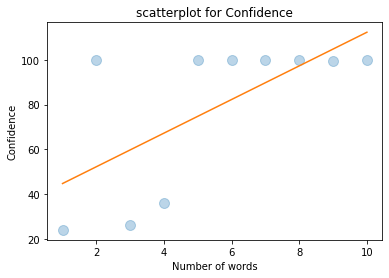

In [65]:
plt.plot(df2['Num_words'], df2['Confidence'], 'o', alpha=0.3, markersize=10)
plt.plot(df2['Num_words'], result2.predict(df2['Num_words']))
plt.title('scatterplot for Confidence' )
plt.xlabel("Number of words")
plt.ylabel("Confidence")

**Findings:** As we can see, both accuracy and confidence increases with the number of words included in a photo. Our inference is that  `textract` is senstive to text length, especially when it tries to detect if the input document has been rotated or not. Nevertheless, as long as document is not too short, `textract` does a phenomenal job in recognizing rotation.
***

### **5. One Last Test(s)?**

Remember the mirror flip case that we conclude that `textract` is not able to process mirror flip image? That conclusion might be wrong now since we do find evidence that textract does care about text length of the input image. To test if `textract` could really process mirror flip image, we need to conduct one last experiment: a mirror flip image with longer length.

**Vertically Flipped Image**

![no-flipped](https://final-source.s3.amazonaws.com/no-flipped.jpg)

![flipped](https://final-source.s3.amazonaws.com/mirror-flipped.jpg)

Check the result

In [66]:
text("final-source", "mirror-flipped.jpg")

'992 1160 29V9 10 odtsord 1160 nom 25 anol o2'

It is clear that the output does not match the original text. So `textract` is not able to process vertically mirror flipped image. What about mirror flipped horizontally?

**Horizontally Flipped Image**

![hori-flipped](https://final-source.s3.amazonaws.com/horizontal-flipped.jpg)

Check the result

In [67]:
text("final-source", "horizontal-flipped.jpg")

',992 1160 29Y9 TO odtsord 1160 nom 25 anol o2'

**Findings:** The weird output indicates that `textract` is not able to recognize the horizontally flipped image. And if we look at the outputs of the two experiments, they are exactly the same although the image looks really different. As the `textract` output looks more similar to the horizontally flipped image, we can infer that `textract` does automaticlly rotate 180 degree for the vertically flipped one in order to get a result that it believes make our sense. In sum, `textract` cannot process documents that are vertically/horizontally flipped. We hope their tech team could update the algorithm, so the service can be deployed in all edge cases.
***

### **One Last Test (Affirmative)**

Out of the concern that there are some lurking variables like the length of text being rotated that affect our test results. We want to confirm our findings that `textract` is **not** able to recognize documents that are partially rotated.

We rotate 180 degree of the first whole line since we know from previous experiment that `textract` is able to recognize this rotated line if it's processed seperately. Let's take a look at the image:

![half](https://final-source.s3.amazonaws.com/rotate-half.jpg)


Check the output:

In [68]:
text("final-source", "rotate-half.jpg")

"'oos uso soão IO ue uou se osSo long lives this and this gives life to thee.Sonnet 18"

**Findings:** From the output, we can see `Textract` was not able to read the first line correctly. We now can conclude that `Textract` cannot process an image/document that is partially rotated, even when it could recognize the rotated part 100% correct seperately. A suggestion for improvement in algorithm is to process the image/document word by word or line by line, so that `textract` could be deployed in these edge cases.

### **Conclusion**

In summary: our findings are:
* `Textract` is able to recognize images that have been rotated in various angles with high accuracy, but might fail if the text length in the image is too short.
* `Textract` is able to recognize handwritten texts with high accuracy.
* `Textract` is **not** able to recognize Chinese.
* `Textract` is **not** able to recognize texts in images/documents that have been partially rotated.
* `Textract` is **not** able to recognize texts in images/documents that have been mirror flipped, both vertically and horizontally.

Our findings demonstrate that `Textract` is an extremely powerful machine learning service with a little room for improvement. We are thrilled to discover this handy tool for text recognition and document processing, which will definitely bring us great convenience in the future.